In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('/Users/yashbhure/Desktop/djs-gdg-tasks/f1_dnf_reduced.csv')

In [3]:
df.replace("\\N", np.nan, inplace=True)

In [4]:
df.drop(columns=[
    "resultId", "full_name", "driverRef", 
    "circuitId:name_circuit", "team_name"
], inplace=True, errors='ignore')


In [5]:
numeric_cols = [ "laps", "fastestLapSpeed", "grid", "year", "round", 'milliseconds', 'positionOrder', 'points']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [6]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [7]:
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [8]:
X = df.drop('target_finish', axis=1)
y = df['target_finish']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Accuracy: 0.9275

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      1421
           1       0.83      0.95      0.88       579

    accuracy                           0.93      2000
   macro avg       0.90      0.93      0.92      2000
weighted avg       0.93      0.93      0.93      2000



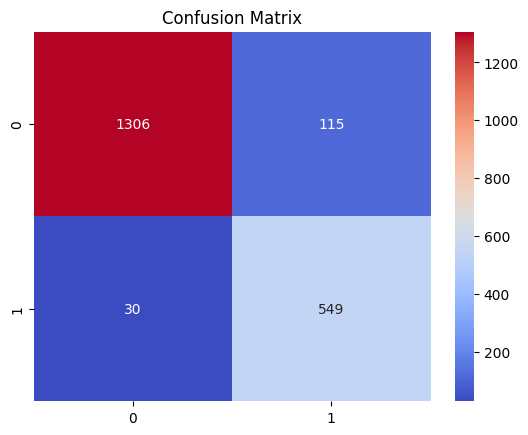

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    random_state=42,
    class_weight='balanced'
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix")
plt.show()


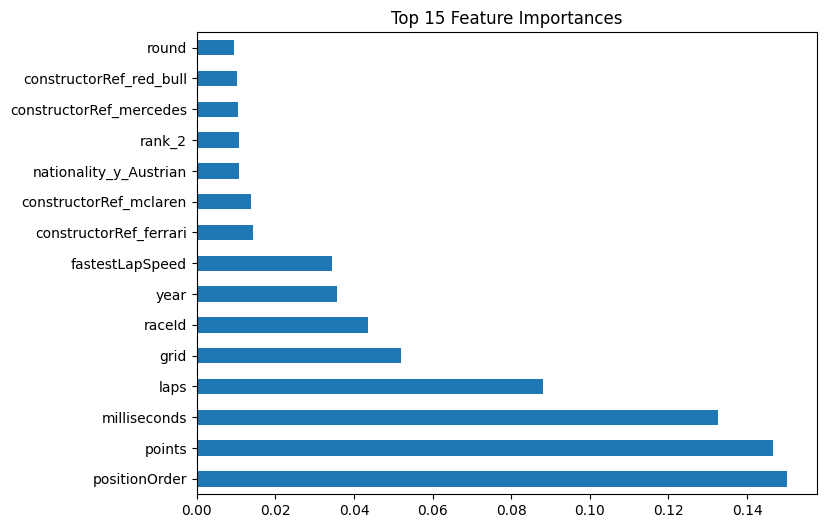

In [11]:
importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances.nlargest(15).plot(kind='barh', figsize=(8,6), title='Top 15 Feature Importances')
plt.show()
